Make simple 2-axis plot and test linearity of stage position values vs **real** vlaues

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


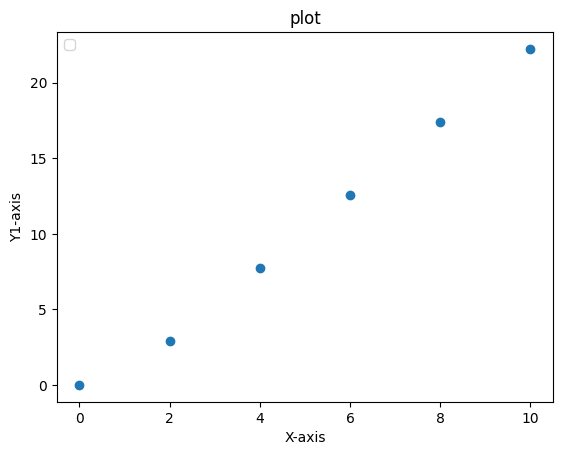

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


# Sample data
#x = [10000,20000,30000,40000,100000,150000,200000,500000,1000000,1500000]
x = [0,2,4,6,8,10]
#y = [0.2894, 0.5788,0.8682,1.1576, 2.8939, 4.3409,5.7879, 14.4697,28.9394,43.4091]
y = [0,2.888,7.72,12.56,17.40,22.24]


# Plotting the first set of data
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y1-axis')
plt.legend(loc='upper left')
plt.title('plot')
plt.show()

Fit a function, in this case check the values above for linearity

In [3]:
def fit_lin(x,a,b):
    return a*x+b

popt, _ = curve_fit(fit_lin, x,y)
a = popt[0]
b = popt[1]
a_inv = 1/a
print(1/a)
print(1/b)
print(f"a: {popt[0]}  b: {popt[1]}")
print(x/a_inv)
print(y)


0.43866245550655675
-1.0749385749337108
a: 2.279657142859934  b: -0.9302857142899239
[ 0.          4.55931429  9.11862857 13.67794286 18.23725714 22.79657143]
[0, 2.888, 7.72, 12.56, 17.4, 22.24]


How to write to a list lol

In [4]:
import time
duration = []
for i in range(10):
    start_time = i+45
    duration.append([i, start_time])
    time.sleep(1)
    print(time.time())

print(duration)

1713174855.2231755
1713174856.223693
1713174857.2241526
1713174858.2253604
1713174859.225808
1713174860.226272
1713174861.2279525
1713174862.2289937
1713174863.229706
1713174864.2305377
[[0, 45], [1, 46], [2, 47], [3, 48], [4, 49], [5, 50], [6, 51], [7, 52], [8, 53], [9, 54]]


This is how real timing can be read out of .txt file <br>
And how to print with timing


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


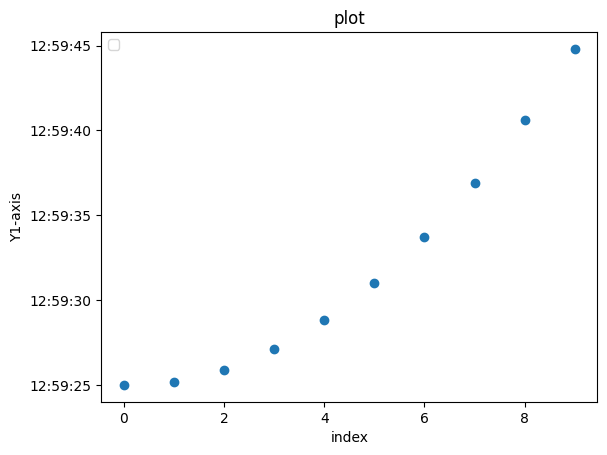

In [ ]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

with open("xx.txt", "r") as positions_file:
    data = positions_file.read()

# Replace "datetime.datetime" with "datetime" in the string representation
data = data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta")
data = eval(data)

# col0 = [sublist[0] for sublist in data]
# print(col0)       # access column
# print(col0[0])    # acces element of column

# col1 = [sublist[1] for sublist in data]
# print(col1)       # access column
# print(col1[0])    # acces element of column

index = [sublist[0] for sublist in data]            # index doesnt make much sense in this context
timing = [sublist[1] for sublist in data]

# Plotting the first set of data
plt.scatter(index, timing)
plt.xlabel('index')
plt.ylabel('Y1-axis')
plt.legend(loc='upper left')
plt.title('plot')
plt.show()

Plot position when triggered over time, test whether the is exactly x seconds difference (whilst trigger with Arduino is set in a constant manner) 

In [ ]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

with open("test_file.txt", "r") as positions_file:
    data = positions_file.read()

# Replace "datetime.datetime" with "datetime" in the string representation
data = eval(data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta"))

timing = [sublist[0].total_seconds() for sublist in data]            # index doesnt make much sense in this context
position = [sublist[2] for sublist in data]

print(timing)
print(position)

# Plotting the first set of data
plt.scatter(timing, position)
plt.xlabel('index')
plt.ylabel('Y1-axis')
plt.legend(loc='upper left')
plt.title('plot')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'test_file.txt'

How many events were actually 1s


In [ ]:
print(timing)
print(len(timing))

diff_timing = [None for _ in range(len(timing)-1)]
x = [None for _ in range(len(timing)-1)]

for i in range(len(timing)-1):
    diff_timing[i] = timing[i+1]-timing[i]
    x[i] = i
print(diff_timing)
plt.scatter(x, diff_timing)
plt.ylim(0,6)
plt.show()

NameError: name 'timing' is not defined

Prepare data from Arduino and Stage to be read out and plotted
This is for one long array

In [ ]:
import ast
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

arg = "ccc"

file_name_arduino = f"data_arduino/arduino_data_{arg}.txt"
file_name_stage = f"data_stage/stage_data_{arg}.txt"

# Read the content of the file
with open(file_name_arduino, "r") as file:
    arduino_data = file.read()

with open(file_name_stage, "r") as file:
    stage_data = file.read()

# convert stage data 
stage_data = eval(stage_data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta"))
print(len(stage_data))

timing = [sublist[0].total_seconds() for sublist in stage_data]            # index doesnt make much sense in this context
position_fw = [sublist[1] for sublist in stage_data]
position_bw = [sublist[2] for sublist in stage_data]

# Safely evaluate the string as a Python expression
arduino_data = ast.literal_eval(arduino_data)
x = [None for _ in range(len(arduino_data))]
print(len(arduino_data))

# Convert strings to integers
ard_data_int = [[int(value) for value in sublist] for sublist in arduino_data]
reed_f0 = [sublist[0] for sublist in ard_data_int]
reed_f1 = [sublist[1] for sublist in ard_data_int]
reed_b0 = [sublist[2] for sublist in ard_data_int]
reed_b1 = [sublist[3] for sublist in ard_data_int]
reed_b2 = [sublist[4] for sublist in ard_data_int]




2


AttributeError: 'list' object has no attribute 'total_seconds'

Plot all Reed Movable Back 

In [ ]:
import matplotlib

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
matplotlib.rc('axes', labelsize=SMALL_SIZE) 
matplotlib.rc('ytick', labelsize=SMALL_SIZE)
matplotlib.rc('ytick', labelsize=SMALL_SIZE)

#fig.constrained_layout()

fig.suptitle('Reed Movable Front')
ax[0,0].step(position_fw,reed_f0[0:len(position_fw)])
ax[0,0].set_title('Forward movement F0', size=SMALL_SIZE)
ax[0,1].step(position_fw,reed_f1[0:len(position_fw)])
ax[0,1].set_title('Forward movement F1', size=SMALL_SIZE)
ax[1,0].step(position_bw,reed_f0[0:len(position_bw)])
ax[1,0].set_title('Backwards movement F0', size=SMALL_SIZE)
ax[1,1].step(position_bw,reed_f1[0:len(position_bw)])
ax[1,1].set_title('Backwards movement F1', size=SMALL_SIZE)


for axis in ax.flat:
    axis.set(xlabel='[mm]', ylabel='on/off')

================================================

In [14]:
import ast
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

arg = "27009"
rounds = 200

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

file_name_arduino = f"data_arduino/arduino_data_{arg}.txt"
file_name_stage = f"data_stage/stage_data_{arg}.txt"

# Read the content of the file
with open(file_name_arduino, "r") as file:
    arduino_data = file.read()

with open(file_name_stage, "r") as file:
    stage_data = file.read()

stage_data = eval(stage_data.replace("datetime.datetime", "datetime").replace("datetime.timedelta", "timedelta"))
stage_data = stage_data[1:len(stage_data)]  

arduino_data = ast.literal_eval(arduino_data)
arduino_data = arduino_data[1:len(arduino_data)]            # shorten data because of errorous first round 
arduino_data = [[[int(v) for v in value] for value in sublist] for sublist in arduino_data]     # convert to int

####### Examples 
# Round one data               
round1_stage = stage_data[0]
round1_ard = arduino_data[0]
# fw stage 
position_bw_r1 = [sublist[1] for sublist in round1_stage]
# reed F0 data 
reed_f0_r1 = [sublist[0] for sublist in round1_ard]


Check, if arduino_data is complete !!

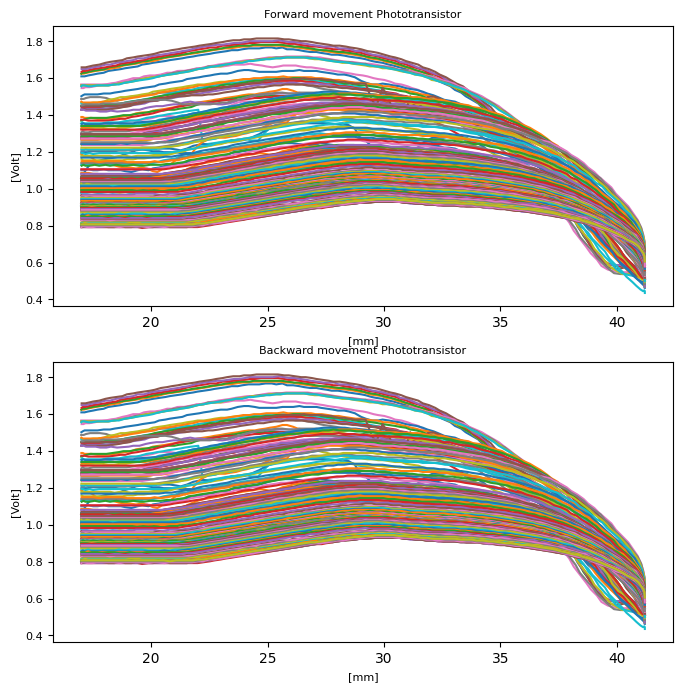

In [16]:
fig, ax = plt.subplots(2,1, figsize=(8, 8))

 # [f0, f1, b0, b1, b2, pd], [fw, bw, at end, at start]

i=0
while i < rounds-1:
    # alle fw rounds von photosensitive

    pos_value_fw = [sublist[0] for sublist in stage_data[i]]
    pos_value_bw = [sublist[0] for sublist in stage_data[i]]
    #print(len(a))
    
    pd_value_inside = [sublist[5] for sublist in arduino_data[i]]

    volt = 5.0/1023.0
    pd_value_inside_volt = [val * volt for val in pd_value_inside]

    ax[0].plot(pos_value_fw, pd_value_inside_volt, label=i)
    ax[1].plot(pos_value_bw, pd_value_inside_volt)    

    i=i+1

ax[0].set_title('Forward movement Phototransistor', size=SMALL_SIZE)
ax[1].set_title('Backward movement Phototransistor', size=SMALL_SIZE)

for axis in ax.flat:
    axis.set(xlabel='[mm]', ylabel='[Volt]')   
    #axis.legend(loc='best', fontsize=6)
plt.show() 

Plot rest over time

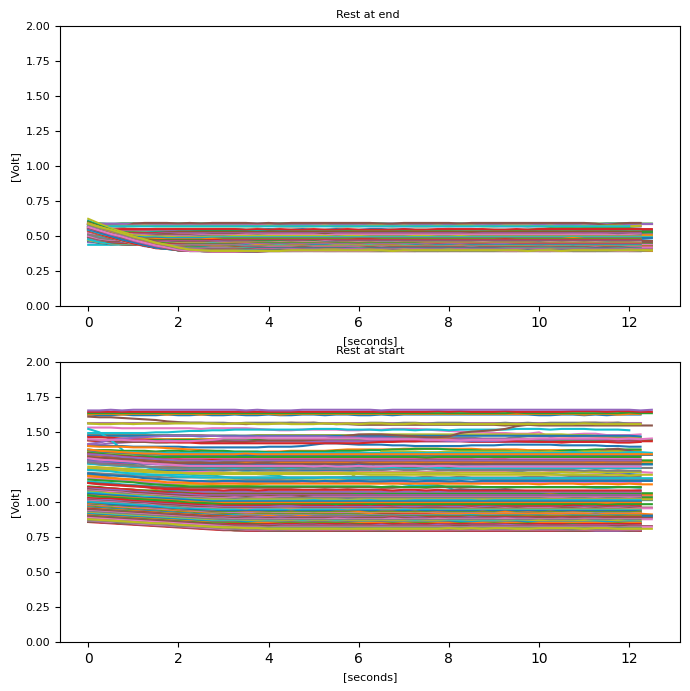

In [12]:
fig, ax = plt.subplots(2,1, figsize=(8, 8))

 # [f0, f1, b0, b1, b2, pd], [fw, bw, at end, at start]
for i in range(rounds-1):
    # alle fw rounds von photosensitive
    pd_value = [sublist[5] for sublist in arduino_data[i]]
    volt = 5.0/1023.0
    pd_value_volt = [val * volt for val in pd_value]

    at_end = [sublist[2] for sublist in stage_data[i]]
    at_start = [sublist[3] for sublist in stage_data[i]]

    at_end_list =[]
    at_start_list = []
    for i in range(len(at_end)):
        if at_end[i] != None:
            at_end_list.append(pd_value_volt[i])
        if at_start[i] != None:
            at_start_list.append(pd_value_volt[i])

    x_end = [i*0.25 for i in range(len(at_end_list))]
    x_start = [i*0.25 for i in range(len(at_start_list))]
    
    ax[0].plot(x_end, at_end_list)
    ax[1].plot(x_start, at_start_list)

ax[0].set_title('Rest at end ', size=SMALL_SIZE)
ax[1].set_title('Rest at start', size=SMALL_SIZE)

for axis in ax.flat:
    axis.set(xlabel='[seconds]', ylabel='[Volt]')  
    axis.set_ylim([0.0,2.0])


plt.show() 

Print entire round (values of PT over increasing x)

[165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 164, 165, 165, 165, 165, 166, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 185, 186, 187, 188, 189, 189, 190, 191, 191, 192, 192, 193, 193, 193, 193, 192, 192, 191, 191, 190, 190, 189, 189, 189, 189, 189, 188, 188, 188, 187, 187, 186, 186, 185, 184, 184, 183, 182, 182, 181, 180, 179, 178, 177, 175, 174, 172, 171, 169, 167, 165, 163, 160, 158, 155, 151, 148, 145, 141, 137, 133, 129, 124, 120, 115, 111, 106, 101, 97, 92, 89, 85, 82, 81, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 80, 81, 81, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 80, 80, 80, 80, 80, 80, 80, 81, 84, 87, 91, 95, 99, 104, 109, 113, 118, 122, 127, 131, 135, 139, 143, 147, 150, 154, 156, 159, 162, 164, 166, 168, 170, 172, 173, 175, 

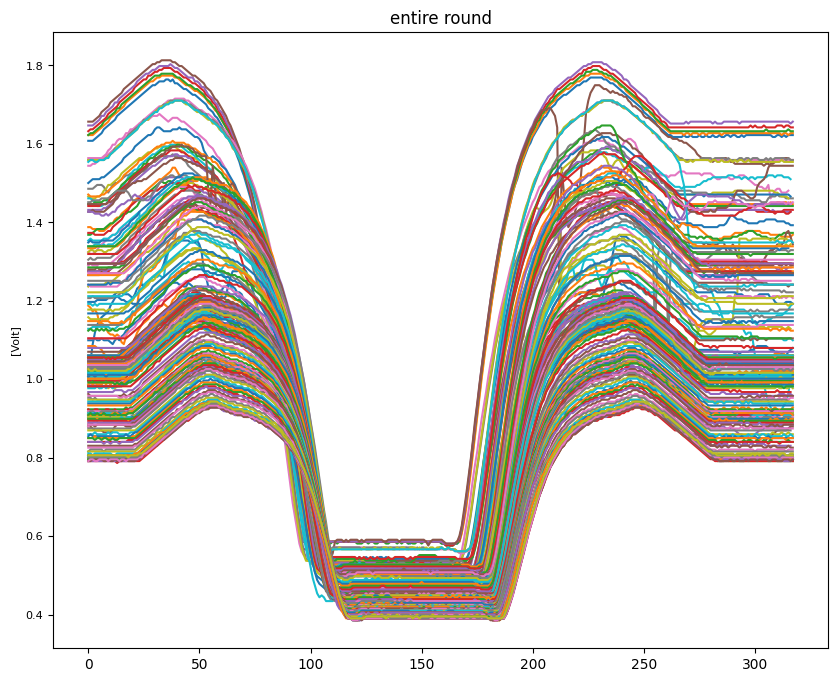

In [17]:
plt.figure(figsize=(10,8))


i=0
while i < rounds-1:
    pd_value_inside = [sublist[5] for sublist in arduino_data[i]]

    volt = 5.0/1023.0
    pd_value_inside_volt = [val * volt for val in pd_value_inside]
    x = [i for i in range (0, len(pd_value_inside_volt))]

    plt.plot(x, pd_value_inside_volt)

    i=i+1 
print(pd_value_inside)
plt.ylabel('[Volt]')
plt.title('entire round')
plt.show() 

[17.00860881498294, 17.068426545548178, 17.145897307388115, 17.30300928573291, 17.514527327678405, 17.6993343075476, 17.967891898087235, 18.159470696510986, 18.428867529521057, 18.69649905940366, 18.88894603969338, 19.15840075149452, 19.426061220772652, 19.617668958591935, 19.88695003401988, 20.07777640815979, 20.346247180512826, 20.615586134731835, 20.807135993760053, 21.07569358429969, 21.34439587181699, 21.536727094524576, 21.805284685064212, 21.996863483487964, 22.26545001342313, 22.533949725171702, 22.726367766065888, 22.994925356605524, 23.263511886540694, 23.455843109248285, 23.723561457317484, 23.915169195136766, 24.183611028094273, 24.454657406649687, 24.644557720132564, 24.913086371276666, 25.180891537532464, 25.374148820897087, 25.642706411436723, 25.83428520986047, 26.102032497325204, 26.372181754619117, 26.5637894924384, 26.83228920418697, 27.100036491651704, 27.291615290075452, 27.560925304898927, 27.753343345793112, 28.021061693862315, 28.28872216314045, 28.4820083859006

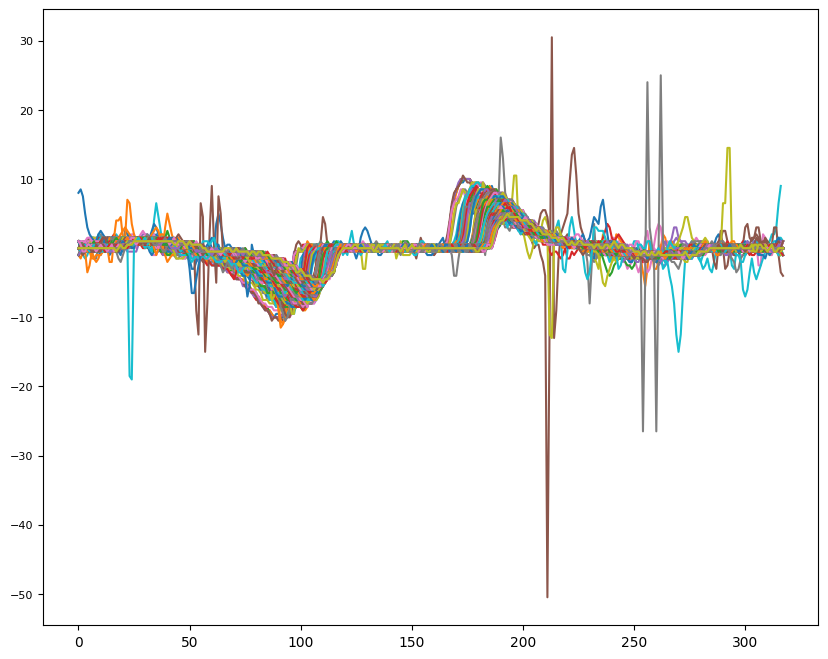

In [24]:
plt.figure(figsize=(10,8))


for i in range(rounds-1):
    # alle fw rounds von photosensitive

    pos_value_fw = [sublist[0] for sublist in stage_data[i]]
    pos_value_bw = [sublist[0] for sublist in stage_data[i]]
    #print(len(a))
    
    pd_value_inside = [sublist[5] for sublist in arduino_data[i]]

    volt = 5.0/1023.0
    pd_value_inside_volt = [val * volt for val in pd_value_inside]

    print(pos_value_fw)
    pd_value_inside = np.array(pd_value_inside)

    derivative_pd_value = np.gradient(pd_value_inside)
    x = [i for i in range (0, len(pd_value_inside_volt))]

    plt.plot(x, derivative_pd_value)
    

plt.show()
 